In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import json

In [35]:
with open('config/config.json', 'r') as file:
    config = json.load(file)

In [36]:
df = pd.read_excel("results/metrics.xlsx")
df_best_metrics = pd.read_csv(config['best_metrics_path'], index_col=0)
df = df.rename(columns={'Unnamed: 0': 'CL_meth', 'Method': 'Port_meth'})
print(df.shape)
df.head()

(132, 9)


,CL_meth,VaR,Beta,Risk,Ret,Sharp,Recovery,Drawdown,Port_meth
0,original_n,-0.069293,-0.263503,0.022822,0.001232,-0.510398,270,-361.646805,Sharp
1,deco_pca_Kmean,-0.069640,-0.266685,0.023026,0.001515,-0.493596,270,-356.680427,Sharp
2,deco_pca_Agglo,-0.082701,-0.292724,0.027295,0.001647,-0.411582,270,-386.589435,Sharp
3,deco_pca_MiniB,-0.065872,-0.257551,0.021778,0.001425,-0.526012,270,-347.486596,Sharp
4,deco_pca_Gauss,-0.068442,-0.251953,0.022522,0.001156,-0.520573,270,-373.257778,Sharp


In [55]:
n_work_days = 250

#df['Ret_year'] = (1 + df['Ret']) ** (n_work_days) - 1
#df['Risk_year'] = (1 + df['Risk']) ** (n_work_days) - 1

df['Ret_year'] = df['Ret'] * n_work_days
df['Risk_year'] = df['Risk'] * n_work_days

In [56]:
df.describe()

,VaR,Beta,Risk,Ret,Sharp,Recovery,Drawdown,Ret_year,Risk_year
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,-0.096093,-0.164344,0.033880,0.008603,-0.182702,246.856061,-305.787035,2.150756,8.469899
std,0.027887,0.191580,0.010423,0.005583,0.229362,135.115282,192.261508,1.395700,2.605696
min,-0.145637,-0.348982,0.016548,0.000499,-0.639922,33.000000,-1744.454650,0.124703,4.137124
25%,-0.128117,-0.250685,0.025874,0.001477,-0.443034,64.000000,-358.327921,0.369373,6.468543
50%,-0.083088,-0.194463,0.030349,0.010826,-0.068584,270.000000,-261.439590,2.706591,7.587349
75%,-0.075928,-0.120502,0.046059,0.013804,0.020035,355.750000,-188.932797,3.450881,11.514866
max,-0.047343,1.000000,0.052299,0.015978,0.060491,444.000000,-172.242628,3.994385,13.074667


# Best metrics Analysis

In [57]:
best_approaches = df_best_metrics['short_name'].values.tolist()
best_approaches.extend(['orig__origi', 'orig__rando', 'sp500'])
print('Best approaches: ', best_approaches)

Best approaches:  ['neur_lstm_Kmean', 'deco_isom_Agglo', 'tabl__Kmean', 'deco_pca_Kmean', 'deco_fast_Kmean', 'neur_mlp_Kmean', 'neur_conv_MiniB', 'orig__Spect', 'orig__origi', 'orig__rando', 'sp500']


In [58]:
df_best = df.query('CL_meth in @best_approaches')
df_best.describe()

,VaR,Beta,Risk,Ret,Sharp,Recovery,Drawdown,Ret_year,Risk_year
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,-0.096222,-0.080245,0.033770,0.008136,-0.195024,234.333333,-311.013315,2.034026,8.442567
std,0.028128,0.353777,0.010447,0.005930,0.233612,143.649458,269.455810,1.482542,2.611850
min,-0.141307,-0.302587,0.018887,0.000499,-0.617070,36.000000,-1744.454650,0.124703,4.721711
25%,-0.128005,-0.236562,0.026054,0.001395,-0.439072,64.000000,-339.959264,0.348801,6.513403
50%,-0.083088,-0.179430,0.030381,0.010797,-0.068577,270.000000,-257.051282,2.699305,7.595350
75%,-0.072863,-0.107967,0.046106,0.013361,0.009660,330.000000,-188.932797,3.340217,11.526434
max,-0.057139,1.000000,0.050891,0.015959,0.060491,444.000000,-188.932797,3.989790,12.722844


In [59]:
df_best.sort_values('Ret_year')

,CL_meth,VaR,Beta,Risk,Ret,Sharp,Recovery,Drawdown,Port_meth,Ret_year,Risk_year
131,sp500,-0.108396,1.000000,0.035238,0.000499,-0.351376,36,-257.051282,Tobin,0.124703,8.809566
87,sp500,-0.108396,1.000000,0.035238,0.000499,-0.351376,36,-257.051282,Markov,0.124703,8.809566
43,sp500,-0.108396,1.000000,0.035238,0.000499,-0.351376,36,-257.051282,Sharp,0.124703,8.809566
40,orig__Spect,-0.073511,-0.274994,0.024130,0.001057,-0.489979,270,-493.164522,Sharp,0.264345,6.032557
12,deco_isom_Agglo,-0.067172,-0.254775,0.022110,0.001152,-0.530481,270,-1744.454650,Sharp,0.287990,5.527397
16,tabl__Kmean,-0.057139,-0.236562,0.018887,0.001226,-0.617070,270,-328.725879,Sharp,0.306542,4.721711
41,orig__origi,-0.069293,-0.263503,0.022822,0.001232,-0.510398,270,-361.646805,Sharp,0.308101,5.705483
26,neur_mlp_Kmean,-0.061163,-0.229863,0.020194,0.001240,-0.576477,270,-404.058093,Sharp,0.309889,5.048394
6,deco_fast_Kmean,-0.070099,-0.275121,0.023136,0.001395,-0.496440,270,-339.959264,Sharp,0.348801,5.783921
42,orig__rando,-0.079070,-0.296984,0.026054,0.001441,-0.439072,270,-358.283585,Sharp,0.360318,6.513403


# Return debugging

<AxesSubplot:>

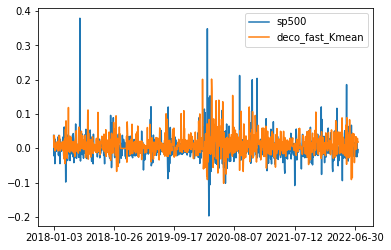

In [53]:
df_port_markov = pd.read_csv('results/df_res_markov.csv', index_col=0)
df_port_markov[['sp500', 'deco_fast_Kmean']].plot()

<AxesSubplot:>

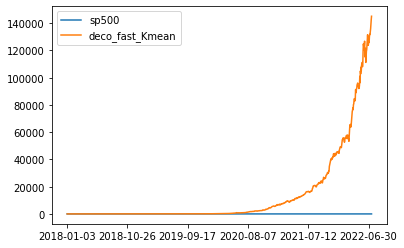

In [50]:
df_port_markov = pd.read_csv('results/df_res_markov.csv', index_col=0)
(1 + df_port_markov[['sp500', 'deco_fast_Kmean']]).cumprod().plot()

<AxesSubplot:>

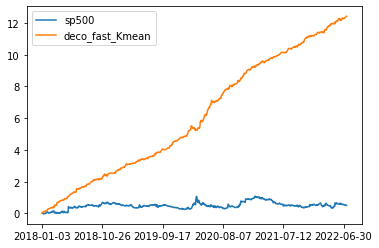

In [54]:
df_port_markov = pd.read_csv('results/df_res_markov.csv', index_col=0)
(df_port_markov[['sp500', 'deco_fast_Kmean']]).cumsum().plot()

<AxesSubplot:>

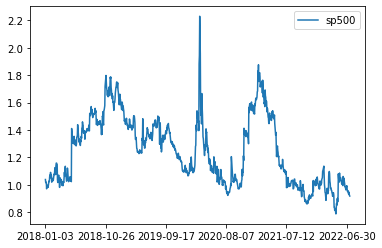

In [51]:
(1 + df_port_markov[['sp500']]).cumprod().plot()

<AxesSubplot:>

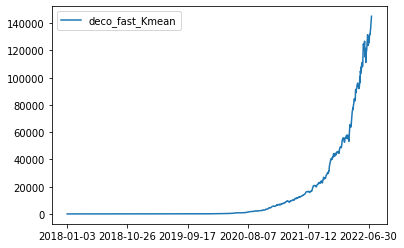

In [52]:
(1 + df_port_markov[['deco_fast_Kmean']]).cumprod().plot()